In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
pd.set_option('display.max_columns', None)
pokemon = pd.read_csv(r"C:\Users\Tyler\Downloads\Pokemon.csv")

In [18]:
pokemon.head()

,Number,Name,Primary type,Secondary type,Abilities,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,Experience type,Experience to level 100,Final Evolution,Catch rate percentage,Legendary,Mega Evolution,Alolan Form,Galarian Form,Against Normal,Against Fire,Against Water,Against Electric,Against Grass,Against Ice,Against Fighting,Against Poison,Against Ground,Against Flying,Against Psychic,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,45,318,53.000000,8.640988,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,60,405,67.500000,8.902247,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,80,525,87.500000,8.902247,1.0,Medium Slow,1059860,1.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,80,625,104.166667,18.747592,6.0,Medium Slow,1059860,1.0,45,0.0,1.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,Fire,None,"['Blaze', 'Solar Power']",39,52,43,60,50,65,309,51.500000,8.995369,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [20]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number                   1032 non-null   int64  
 1   Name                     1032 non-null   object 
 2   Primary type             1032 non-null   object 
 3   Secondary type           1032 non-null   object 
 4   Abilities                1032 non-null   object 
 5   HP                       1032 non-null   int64  
 6   Att                      1032 non-null   int64  
 7   Def                      1032 non-null   int64  
 8   Spa                      1032 non-null   int64  
 9   Spd                      1032 non-null   int64  
 10  Spe                      1032 non-null   int64  
 11  BST                      1032 non-null   int64  
 12  Mean                     1032 non-null   float64
 13  Standard Deviation       1032 non-null   float64
 14  Generation              

In [21]:
f'There is {pokemon.shape[0]} observations and {pokemon.shape[1]} columns in the pokemon dataset'

'There is 1032 observations and 41 columns in the pokemon dataset'

#### Fill missing values and changing column name

In [4]:
pokemon['Type 2'].fillna('None', inplace=True)
pokemon.rename(columns={'Catch Rate':'Catch rate percentage', 'Type 1':'Primary type',
                       'Type 2':'Secondary type'},
               inplace=True)

### A Look at the Classic: Generation One

In [5]:
def get_generation(df, generation):
    gen = df[df['Generation']==generation]
    gen.reset_index(drop=True, inplace=True)
    return gen

gen_one = get_generation(pokemon, 1)
gen_one = gen_one.drop(columns=['Mean', 'Standard Deviation', 
                               'Mega Evolution', 'Alolan Form', 'Galarian Form'])
gen_one.set_index('Number', inplace=True)
gen_one.rename(columns={'BST':'Total', 
               'Experience type' : 'Growth rate',
                        'Catch Rate': 'Catch Rate Percentage'}, 
              inplace = True)
# gen_one.head()

In [6]:
growth_rate_stat = gen_one.groupby('Growth rate')['Growth rate'].count()
num_of_legendary = gen_one[gen_one['Legendary']==1]['Legendary'].count()
# print(num_of_legendary)

#### What kind of pokemon have slow growth rate?
##### Will only consider pokemons that has fully evolved.

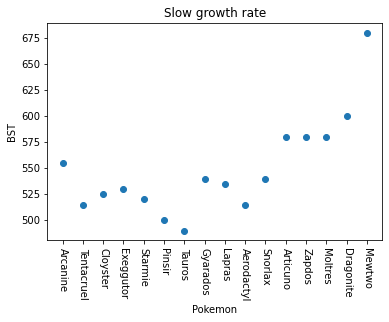

In [7]:
slow_rate = gen_one[(gen_one['Growth rate'] =='Slow') & (gen_one['Final Evolution']==1)]
plt.scatter(slow_rate['Name'], slow_rate['Total'])
plt.xticks(rotation=270)
plt.xlabel('Pokemon')
plt.title('Slow growth rate')
plt.ylabel('BST')
plt.show()

In [8]:
slow = gen_one[(gen_one['Growth rate'] =='Slow') & (gen_one['Final Evolution']==1)]['Total']
fast = gen_one[(gen_one['Growth rate']=='Fast') & (gen_one['Final Evolution']==1)]['Total']
medium_fast = gen_one[(gen_one['Growth rate']=='Medium Fast') & (gen_one['Final Evolution']==1)]['Total']
medium_slow = gen_one[(gen_one['Growth rate']=='Medium Slow') & (gen_one['Final Evolution']==1)]['Total']

#### Total stat comparision

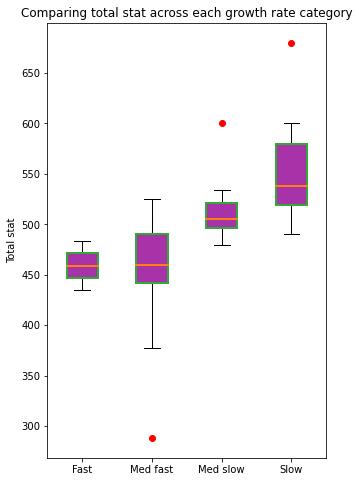

In [9]:
labels = ['Fast', 'Med fast', 'Med slow', 'Slow']

plt.figure(figsize=(5, 8))
boxes = plt.boxplot([fast, medium_fast, medium_slow, slow], labels=labels,
                   patch_artist=True, medianprops = {'linewidth':2},
                   flierprops=dict(markeredgecolor='r', mfc='r'))

for box in boxes['boxes']:
    box.set(color='#32a838', linewidth=2)
    box.set(facecolor='#a832a8')
    
    
plt.ylabel('Total stat')
plt.title('Comparing total stat across each growth rate category')
plt.show()

In the medium fast growth rate, there is at least one fully evolved pokemon that has low total stat.
In the medium slow and slow growth rate, there is at least one fully evolved pokemon that has high total stat compare to other pokemons in the growth rate group.

#### Which type(s) is(are) the best in Generation One?

In [10]:
single = gen_one[gen_one['Secondary type']=='None']
# single.head()
single_type = single.iloc[:, -18:-3]

type_rename = {'Against Normal':'Against_Normal', 'Against Fire':'Against_Fire', 'Against Water':'Against_Water',
              'Against Electric':'Against_Electric', 'Against Grass':'Against_Grass', 'Against Ice':'Against_Ice',
              'Against Fighting':'Against_Fighting', 'Against Poison':'Against_Poison', 'Against Ground':'Against_Ground',
              'Against Flying':'Against_Flying', 'Against Psychic':'Against_Psychic', 'Against Bug' :'Against_Bug', 
              'Against Rock':'Against_Rock', 'Against Ghost':'Against_Ghost', 'Against Dragon':'Against_Dragon',
              'Against Dark':'Against_Dark', 'Against Steel':'Against_Steel', 'Against Fairy':'Against_Fairy'}

single_type.rename(columns=type_rename, inplace=True)
single_type['Primary'] = single['Primary type']
single_type.set_index(single['Name'], inplace=True)
single_type.head()

,Against_Normal,Against_Fire,Against_Water,Against_Electric,Against_Grass,Against_Ice,Against_Fighting,Against_Poison,Against_Ground,Against_Flying,Against_Psychic,Against_Bug,Against_Rock,Against_Ghost,Against_Dragon,Primary
Name,,,,,,,,,,,,,,,,
Charmander,1.0,0.5,2.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,Fire
Charmeleon,1.0,0.5,2.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,Fire
Squirtle,1.0,0.5,0.5,2.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Water
Wartortle,1.0,0.5,0.5,2.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Water
Blastoise,1.0,0.5,0.5,2.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Water


Note that in Generation one, steel, dark, and fairy type did not exist, it was introduced in later generations. That's why those three types are not included. Also, there are some pokemons in generation one that received a secondary type in later generations and those pokemons are left untounched.

In [11]:
def weakness(df):
    num = []
    for i in range(len(df)):
        j = 0
        for k in range(len(df.columns[:18])):
            if df.iloc[i, k] == 2:
                j+=1
            else:
                pass 
        num.append(j)
    return num

def strength(df):
    num = []
    for i in range(len(df)):
        j = 0
        for k in range(len(df.columns[:18])):
            if df.iloc[i, k] == 0.5:
                j+=1
            else:
                pass 
        num.append(j)
    return num

single_type['num_of_weakness'] = weakness(single_type)
single_type['num_of_strength'] = strength(single_type)
single_type.head()

,Against_Normal,Against_Fire,Against_Water,Against_Electric,Against_Grass,Against_Ice,Against_Fighting,Against_Poison,Against_Ground,Against_Flying,Against_Psychic,Against_Bug,Against_Rock,Against_Ghost,Against_Dragon,Primary,num_of_weakness,num_of_strength
Name,,,,,,,,,,,,,,,,,,
Charmander,1.0,0.5,2.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,Fire,3,4
Charmeleon,1.0,0.5,2.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,Fire,3,4
Squirtle,1.0,0.5,0.5,2.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Water,2,3
Wartortle,1.0,0.5,0.5,2.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Water,2,3
Blastoise,1.0,0.5,0.5,2.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Water,2,3


In [12]:
weakness_and_strength_single = single_type.groupby('Primary').agg({'num_of_weakness':'mean', 'num_of_strength':'mean'})
weakness_and_strength_single

,num_of_weakness,num_of_strength
Primary,,
Bug,3,3
Dragon,2,4
Electric,1,2
Fairy,1,2
Fighting,2,2
Fire,3,4
Grass,5,4
Ground,3,2
Normal,1,0


Types that have the least number of weaknesses are normal and electric.
Types that have the most number of strengths are dragon, fire, grass, and poison.

In [13]:
double = gen_one[gen_one['Secondary type'] !='None']
double_type = double.iloc[:, -18:-3]
double_type.rename(columns=type_rename, inplace=True)
double_type['Primary'] = double['Primary type']
double_type['Secondary'] = double['Secondary type']
double_type.set_index(double['Name'], inplace=True)
double_type.head()

,Against_Normal,Against_Fire,Against_Water,Against_Electric,Against_Grass,Against_Ice,Against_Fighting,Against_Poison,Against_Ground,Against_Flying,Against_Psychic,Against_Bug,Against_Rock,Against_Ghost,Against_Dragon,Primary,Secondary
Name,,,,,,,,,,,,,,,,,
Bulbasaur,1.0,2.0,0.5,0.5,0.25,2.0,0.50,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,Grass,Poison
Ivysaur,1.0,2.0,0.5,0.5,0.25,2.0,0.50,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,Grass,Poison
Venusaur,1.0,2.0,0.5,0.5,0.25,2.0,0.50,1.0,1.0,2.0,2.0,1.00,1.0,1.0,1.0,Grass,Poison
Charizard,1.0,0.5,2.0,2.0,0.25,1.0,0.50,1.0,0.0,1.0,1.0,0.25,4.0,1.0,1.0,Fire,Flying
Butterfree,1.0,2.0,1.0,2.0,0.25,2.0,0.25,1.0,0.0,2.0,1.0,0.50,4.0,1.0,1.0,Bug,Flying


In [14]:
double_type['num_of_weakness'] = weakness(double_type)
double_type['num_of_strength'] = strength(double_type)
weakness_and_strength_double = double_type.groupby(['Primary', 'Secondary']).agg({'num_of_weakness':'mean', 'num_of_strength':'mean'})
weakness_and_strength_double

num_of_weakness  num_of_strength
Primary  Secondary                                  
Bug      Flying                   4                1
         Grass                    4                3
         Poison                   4                2
Dragon   Flying                   2                4
Electric Flying                   2                4
         Steel                    2                8
Fire     Flying                   2                2
Ghost    Poison                   3                1
Grass    Poison                   4                3
         Psychic                  5                6
Ground   Rock                     3                4
Ice      Flying                   2                2
         Psychic                  4                2
Normal   Fairy                    1                1
         Flying                   3                2
Poison   Flying                   4                1
         Ground                   4                3
Psychic  Fairy                    2                1
Rock     Flying                   4                5
         Ground                   3                4
         Water                    3                4
Water    Fighting                 4                5
         Flying                   1                4
         Ice                      4                1
         Poison                   3                6
         Psychic                  4                5

Looks like pokemon with water and flying types has the least number of weakness and pokemon with water(and poison) and grass(and psychic) types have the most number of strengths

Remainder: Steel and fairy types that are listed does not count because these types were not in generation one. The reason why they exist under generation one because some of the Gen-1 pokemons got an secondary type in later generations.

### Additional analysis of the pokemon dataset

#### Number of new pokemons introduced in each generation

In [15]:
gens = pokemon.groupby('Generation')['Generation'].count()
# labels = ['Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6', 'Gen 7', 'Gen 8']
# plt.pie(gens, labels = labels, autopct = '%1.1f%%', startangle=90)
# plt.show()
print(gens)

Generation
1.0    151
2.0    100
3.0    138
4.0    116
5.0    163
6.0    133
7.0    116
8.0    115
Name: Generation, dtype: int64


#### Number of new legendary pokemons introduced in each generation

In [16]:
pokemon.groupby(['Generation', 'Legendary'])['Generation'].count()

Generation  Legendary
1.0         0.0          146
            1.0            5
2.0         0.0           94
            1.0            6
3.0         0.0          125
            1.0           13
4.0         0.0          100
            1.0           16
5.0         0.0          144
            1.0           19
6.0         0.0          116
            1.0           17
7.0         0.0           86
            1.0           30
8.0         0.0           96
            1.0           19
Name: Generation, dtype: int64

#### The 10 most powerful legendary pokemon and non-legendary

In [24]:
top_10_legend = pokemon[pokemon['Legendary']==1].nlargest(10, columns='BST')
top_10_non_legend = pokemon[pokemon['Legendary']==0].nlargest(10, columns='BST')
display(top_10_legend)
print()
display(top_10_non_legend)

,Number,Name,Primary type,Secondary type,Abilities,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,Experience type,Experience to level 100,Final Evolution,Catch rate percentage,Legendary,Mega Evolution,Alolan Form,Galarian Form,Against Normal,Against Fire,Against Water,Against Electric,Against Grass,Against Ice,Against Fighting,Against Poison,Against Ground,Against Flying,Against Psychic,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy
192,150,Mega Mewtwo Y,Psychic,None,['Insomnia'],106,150,70,194,120,140,780,130.000000,38.453435,6.0,Slow,1250000,1.0,3,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.00,1.0,0.5,1.0,1.0,1.0,0.5,2.00,1.00,2.0,1.0,2.0,1.0,1.0
193,150,Mega Mewtwo X,Psychic,Fighting,['Steadfast'],106,190,100,154,100,130,780,130.000000,33.045423,6.0,Slow,1250000,1.0,3,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.00,1.0,0.5,1.0,1.0,2.0,1.0,1.00,0.50,2.0,1.0,1.0,1.0,2.0
459,384,Mega Rayquaza,Dragon,Flying,['Delta Stream'],105,180,100,180,100,115,780,130.000000,35.707142,6.0,Slow,1250000,1.0,45,1.0,1.0,0.0,0.0,1.0,0.5,0.5,1.0,0.25,4.0,0.5,1.0,0.0,1.0,1.0,0.50,2.00,1.0,2.0,1.0,1.0,2.0
455,382,Primal Kyogre,Water,None,['Primordial Sea'],100,150,90,180,160,90,770,128.333333,36.247605,6.0,Slow,1250000,1.0,3,1.0,1.0,0.0,0.0,1.0,0.5,0.5,2.0,2.00,0.5,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.0,1.0,1.0,0.5,1.0
457,383,Primal Groudon,Ground,Fire,['Desolate Land'],100,180,160,150,90,90,770,128.333333,36.247605,6.0,Slow,1250000,1.0,3,1.0,1.0,0.0,0.0,1.0,0.5,4.0,0.0,1.00,1.0,1.0,0.5,2.0,1.0,1.0,0.50,1.00,1.0,1.0,1.0,0.5,0.5
927,800,Ultra Necrozma,Psychic,Dragon,['Prism Armor'],97,167,97,167,97,129,754,125.666667,31.340425,7.0,Slow,1250000,1.0,255,1.0,0.0,0.0,0.0,1.0,0.5,0.5,0.5,0.50,2.0,0.5,1.0,1.0,1.0,0.5,2.00,1.00,2.0,2.0,2.0,1.0,2.0
585,493,Arceus,Normal,None,['Multitype'],120,120,120,120,120,120,720,120.000000,0.000000,4.0,Slow,1250000,1.0,3,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.00,1.0,2.0,1.0,1.0,1.0,1.0,1.00,1.00,0.0,1.0,1.0,1.0,1.0
1017,888,Zacian Crowned Sword,Fairy,Steel,['Intrepid Sword'],92,170,115,80,115,148,720,120.000000,30.870698,8.0,Slow,1250000,1.0,10,1.0,0.0,0.0,0.0,0.5,2.0,1.0,1.0,0.50,0.5,1.0,0.0,2.0,0.5,0.5,0.25,0.50,1.0,0.0,0.5,1.0,0.5
1019,889,Zamazenta Crowned Shield,Fighting,Steel,['Dauntless Shield'],92,130,145,80,145,128,720,120.000000,25.159491,8.0,Slow,1250000,1.0,10,1.0,0.0,0.0,0.0,0.5,2.0,1.0,1.0,0.50,0.5,2.0,0.0,2.0,1.0,1.0,0.25,0.25,1.0,0.5,0.5,0.5,1.0
833,718,Zygarde Complete,Dragon,Ground,"['Aura Break', 'Power Construct']",216,100,121,91,95,85,708,118.000000,45.247468,6.0,Slow,1250000,1.0,3,1.0,0.0,0.0,0.0,1.0,0.5,1.0,0.0,1.00,4.0,1.0,0.5,1.0,1.0,1.0,1.00,0.50,1.0,2.0,1.0,1.0,2.0


,Number,Name,Primary type,Secondary type,Abilities,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,Experience type,Experience to level 100,Final Evolution,Catch rate percentage,Legendary,Mega Evolution,Alolan Form,Galarian Form,Against Normal,Against Fire,Against Water,Against Electric,Against Grass,Against Ice,Against Fighting,Against Poison,Against Ground,Against Flying,Against Psychic,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy
299,248,Mega Tyranitar,Rock,Dark,['Sand Stream'],100,164,150,95,120,71,700,116.666667,32.133402,6.0,Slow,1250000,1.0,45,0.0,1.0,0.0,0.0,0.5,0.50,2.0,1.0,2.00,1.0,4.0,0.5,2.0,0.5,0.00,2.00,1.0,0.5,1.0,0.5,2.0,2.0
442,373,Mega Salamence,Dragon,Flying,['Aerilate'],95,145,130,120,90,120,700,116.666667,19.075872,6.0,Slow,1250000,1.0,45,0.0,1.0,0.0,0.0,1.0,0.50,0.5,1.0,0.25,4.0,0.5,1.0,0.0,1.0,1.00,0.50,2.0,1.0,2.0,1.0,1.0,2.0
446,376,Mega Metagross,Steel,Psychic,['Tough Claws'],80,145,150,105,110,110,700,116.666667,24.094720,6.0,Slow,1250000,1.0,3,0.0,1.0,0.0,0.0,0.5,2.00,1.0,1.0,0.50,0.5,1.0,0.0,2.0,0.5,0.25,1.00,0.5,2.0,0.5,2.0,0.5,0.5
527,445,Mega Garchomp,Dragon,Ground,['Sand Force'],108,170,115,120,95,92,700,116.666667,25.856441,6.0,Slow,1250000,1.0,45,0.0,1.0,0.0,0.0,1.0,0.50,1.0,0.0,1.00,4.0,1.0,0.5,1.0,1.0,1.00,1.00,0.5,1.0,2.0,1.0,1.0,2.0
346,289,Slaking,Normal,None,['Truant'],150,160,100,95,65,100,670,111.666667,32.998316,3.0,Slow,1250000,1.0,45,0.0,0.0,0.0,0.0,1.0,1.00,1.0,1.0,1.00,1.0,2.0,1.0,1.0,1.0,1.00,1.00,1.0,0.0,1.0,1.0,1.0,1.0
167,130,Mega Gyarados,Water,Dark,['Mold Breaker'],95,155,109,70,130,81,640,106.666667,28.940552,6.0,Slow,1250000,1.0,45,0.0,1.0,0.0,0.0,1.0,0.50,0.5,2.0,2.00,0.5,2.0,1.0,1.0,1.0,0.00,2.00,1.0,0.5,1.0,0.5,0.5,2.0
764,658,Ash-Greninja,Water,Dark,['Battle Bond'],72,145,67,153,71,132,640,106.666667,37.205137,6.0,Medium Slow,1059860,1.0,45,0.0,0.0,0.0,0.0,1.0,0.50,0.5,2.0,2.00,0.5,2.0,1.0,1.0,1.0,0.00,2.00,1.0,0.5,1.0,0.5,0.5,2.0
314,260,Mega Swampert,Water,Ground,['Swift Swim'],100,150,110,95,110,70,635,105.833333,23.877581,6.0,Medium Slow,1059860,1.0,45,0.0,1.0,0.0,0.0,1.0,0.50,1.0,0.0,4.00,1.0,1.0,0.5,1.0,1.0,1.00,1.00,0.5,1.0,1.0,1.0,0.5,1.0
7,6,Mega Charizard Y,Fire,Flying,['Drought'],78,104,78,159,115,100,634,105.666667,27.378012,6.0,Medium Slow,1059860,1.0,45,0.0,1.0,0.0,0.0,1.0,0.50,2.0,2.0,0.25,1.0,0.5,1.0,0.0,1.0,1.00,0.25,4.0,1.0,1.0,1.0,0.5,0.5
8,6,Mega Charizard X,Fire,Dragon,['Tough Claws'],78,130,111,130,85,100,634,105.666667,20.154955,6.0,Medium Slow,1059860,1.0,45,0.0,1.0,0.0,0.0,1.0,0.25,1.0,0.5,0.25,1.0,1.0,1.0,2.0,1.0,1.00,0.50,2.0,1.0,2.0,1.0,0.5,1.0
